<a href="https://colab.research.google.com/github/sangeeth-sadanand/data-science-learning/blob/main/Plot_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot

## 📊 **Common Matplotlib Plots: Functions & Key Parameters**

| **Plot Type**       | **Function**            | **Key Parameters**                                                                                  |
|---------------------|-------------------------|-----------------------------------------------------------------------------------------------------|
| **Line Plot**       | `plt.plot()`            | `x`, `y`, `color`, `linestyle`, `linewidth`, `marker`, `label`                                      |
| **Scatter Plot**    | `plt.scatter()`         | `x`, `y`, `color`, `marker`, `s` (size), `alpha`, `cmap`                                            |
| **Bar Chart**       | `plt.bar()`             | `x`, `height`, `width`, `color`, `align`, `edgecolor`, `label`                                      |
| **Horizontal Bar**  | `plt.barh()`            | `y`, `width`, same as above                                                                         |
| **Histogram**       | `plt.hist()`            | `x`, `bins`, `density`, `color`, `alpha`, `histtype`, `rwidth`                                      |
| **Pie Chart**       | `plt.pie()`             | `x`, `labels`, `autopct`, `colors`, `explode`, `shadow`, `startangle`                               |
| **Box Plot**        | `plt.boxplot()`         | `x`, `notch`, `vert`, `patch_artist`, `boxprops`, `labels`                                          |
| **Error Bars**      | `plt.errorbar()`        | `x`, `y`, `xerr`, `yerr`, `fmt`, `ecolor`, `capsize`, `linestyle`, `linewidth`                      |
| **Stack Plot**      | `plt.stackplot()`       | `x`, `y1, y2,…`, `labels`, `colors`, `alpha`                                                        |
| **Area Plot**       | `plt.fill_between()`    | `x`, `y1`, `y2` (optional), `color`, `alpha`, `where`, `interpolate`                                |
| **Step Plot**       | `plt.step()`            | `x`, `y`, `where`, `linestyle`, `color`                                                             |
| **Polar Plot**      | `ax.plot()` (polar)     | `theta`, `r`, within `projection='polar'` axes; supports same styling as line plot                  |
| **3D Line/Scatter** | `ax.plot3D()`, `ax.scatter3D()` | `x`, `y`, `z`, `color`, `marker`, `label`, within 3D `Axes3D`                               |
| **Heatmap / Image** | `plt.imshow()`          | `X`, `cmap`, `aspect`, `interpolation`, `origin`, `extent`, `vmin`, `vmax`                          |
| **Contour Plot**    | `plt.contour()`         | `X`, `Y`, `Z`, `levels`, `colors`, `linestyles`, `cmap`                                             |
| **Filled Contour**  | `plt.contourf()`        | Same as above, but fills space between contours                                                     |
| **Quiver Plot**     | `plt.quiver()`          | `X`, `Y`, `U`, `V`, `color`, `scale`, `angles`, `pivot`, `cmap`                                     |
| **Streamplot**      | `plt.streamplot()`      | `X`, `Y`, `U`, `V`, `density`, `color`, `linewidth`, `arrowsize`                                    |


## 🧠 Bonus Tools for Enhanced Control

| **Task**                   | **Function(s)**                         |
|---------------------------|------------------------------------------|
| Customize Axes/Title      | `ax.set_title()`, `ax.set_xlabel()` etc. |
| Add Text                  | `plt.text()`, `ax.annotate()`            |
| Customize Ticks           | `plt.xticks()`, `plt.yticks()`           |
| Add Grid                  | `plt.grid(True)`                         |
| Add Legend                | `plt.legend()`                           |
| Save Plot                 | `plt.savefig("plot.png", dpi=300)`       |


## Line Plot

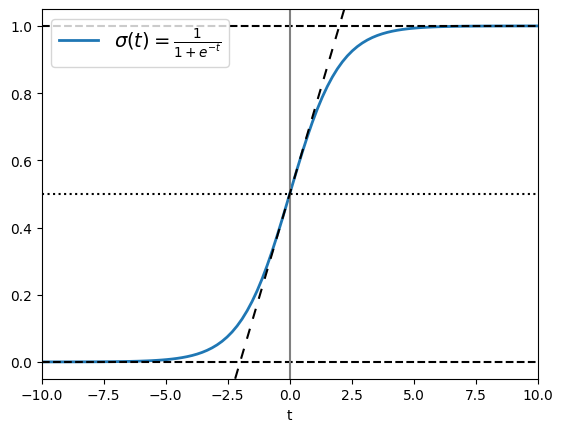

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

fig, ax = plt.subplots()
ax.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

# Add horizonatal lines
ax.axhline(y=0, color="black", linestyle="--")
ax.axhline(y=0.5, color="black", linestyle=":")
ax.axhline(y=1.0, color="black", linestyle="--")

# Vertical line at 0
ax.axvline(color="grey")

# adding a slanting line indicating slope
ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))

# Set xlimit
ax.set(xlim=(-10, 10), xlabel="t")
ax.legend(fontsize=14)

plt.show()

## Scatter plot

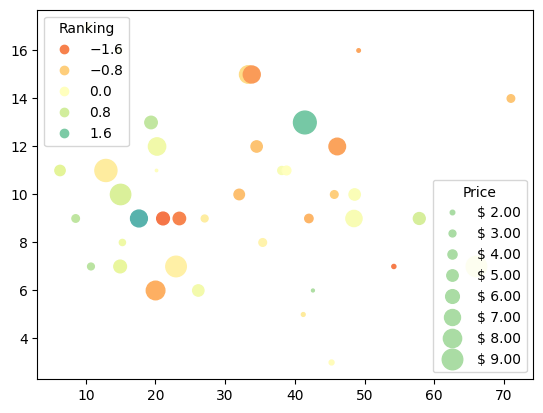

In [ ]:
volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

kw = dict(prop="sizes", num=6, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")
plt.show()

## Bar chart

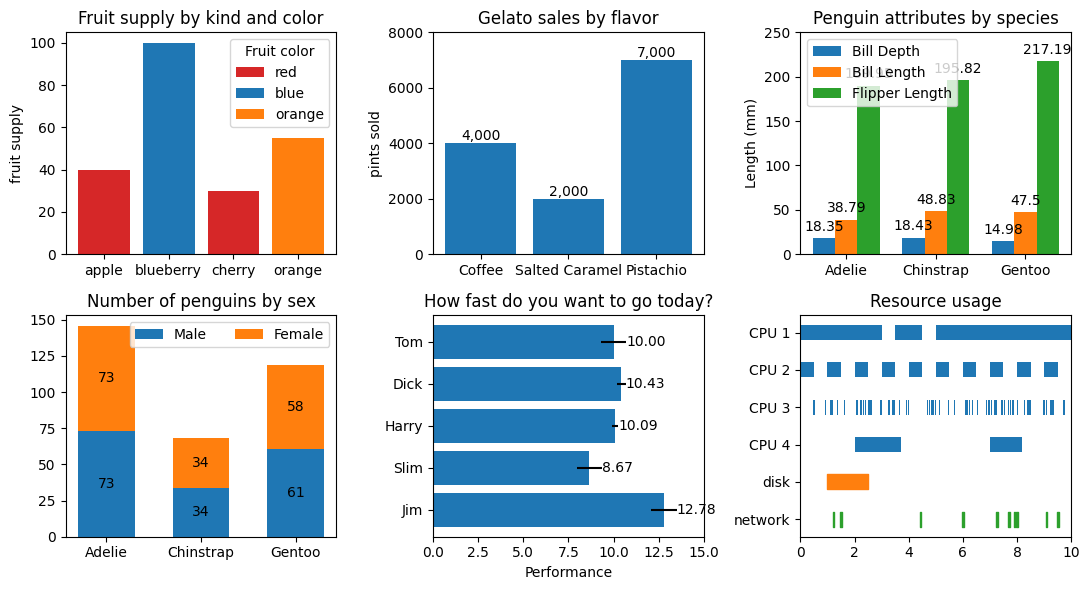

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,3, figsize=(11, 6))

## Plot 1
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax[0,0].bar(fruits, counts, label=bar_labels, color=bar_colors)

ax[0,0].set_ylabel('fruit supply')
ax[0,0].set_title('Fruit supply by kind and color')
ax[0,0].legend(title='Fruit color')

## plot 2

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6

bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax[1,0].bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax[1,0].bar_label(p, label_type='center')

ax[1,0].set_title('Number of penguins by sex')
ax[1,0].legend(ncols=3)

## Plot 3

fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

bar_container = ax[0,1].bar(fruit_names, fruit_counts)
ax[0,1].set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
ax[0,1].bar_label(bar_container, fmt='{:,.0f}')

## Plot 4
np.random.seed(19680801)
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

hbars = ax[1,1].barh(y_pos, performance, xerr=error, align='center')
ax[1,1].set_yticks(y_pos, labels=people)
ax[1,1].invert_yaxis()  # labels read top-to-bottom
ax[1,1].set_xlabel('Performance')
ax[1,1].set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax[1,1].bar_label(hbars, fmt='%.2f')
ax[1,1].set_xlim(right=15)  # adjust xlim to fit labels

## Plot 5

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax[0,2].bar(x + offset, measurement, width, label=attribute)
    ax[0,2].bar_label(rects, padding=3)
    multiplier += 1

ax[0,2].set_ylabel('Length (mm)')
ax[0,2].set_title('Penguin attributes by species')
ax[0,2].set_xticks(x + width, species)
ax[0,2].legend(loc='upper left')
ax[0,2].set_ylim(0, 250)


## Plot 6

cpu_1 = [(0, 3), (3.5, 1), (5, 5)]
cpu_2 = np.column_stack([np.linspace(0, 9, 10), np.full(10, 0.5)])
cpu_3 = np.column_stack([10*np.random.random(61), np.full(61, 0.05)])
cpu_4 = [(2, 1.7), (7, 1.2)]
disk = [(1, 1.5)]
network = np.column_stack([10*np.random.random(10), np.full(10, 0.05)])


ax[1,2].broken_barh(cpu_1, (-0.2, 0.4))
ax[1,2].broken_barh(cpu_2, (0.8, 0.4))
ax[1,2].broken_barh(cpu_3, (1.8, 0.4))
ax[1,2].broken_barh(cpu_4, (2.8, 0.4))
ax[1,2].broken_barh(disk, (3.8, 0.4), color="tab:orange")
ax[1,2].broken_barh(network, (4.8, 0.4), color="tab:green")
ax[1,2].set_xlim(0, 10)
ax[1,2].set_yticks(range(6),
              labels=["CPU 1", "CPU 2", "CPU 3", "CPU 4", "disk", "network"])
ax[1,2].invert_yaxis()
ax[1,2].set_title("Resource usage")


plt.tight_layout()
plt.show()

## Histogram

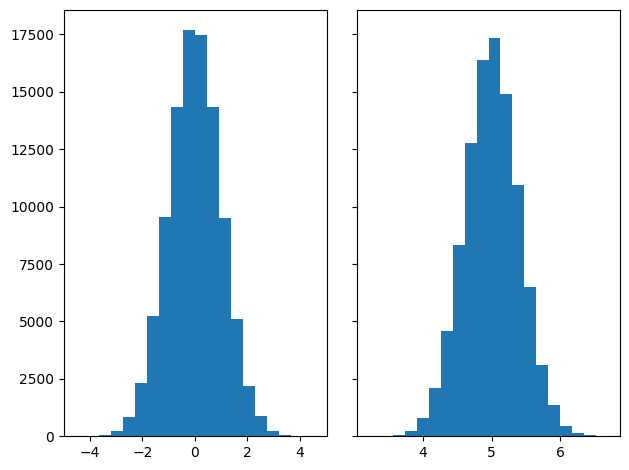

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

plt.show()

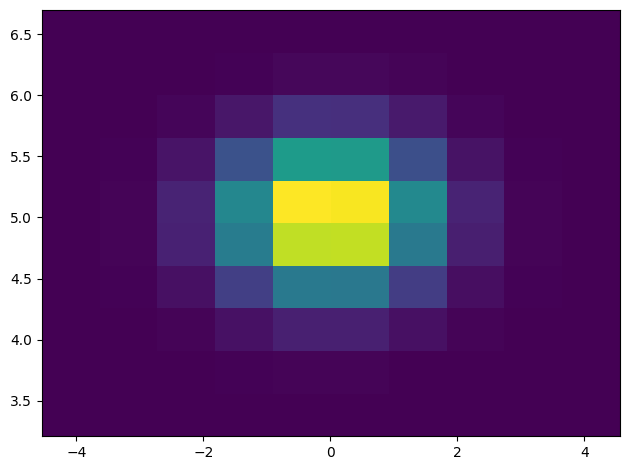

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dist1, dist2)

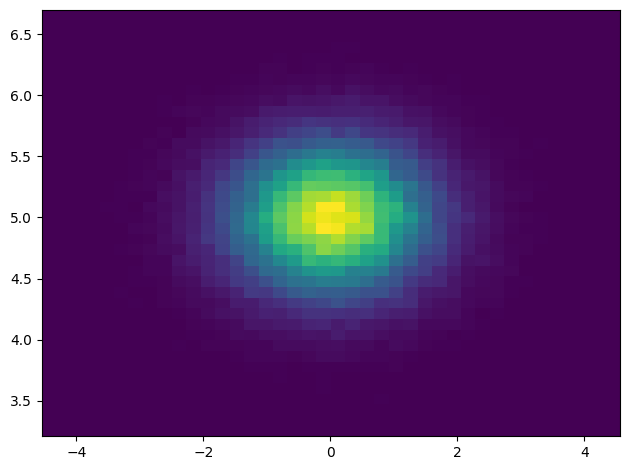

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
s = ax.hist2d(dist1, dist2, bins=40)

## Pie Chart

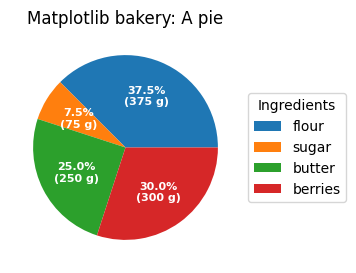

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

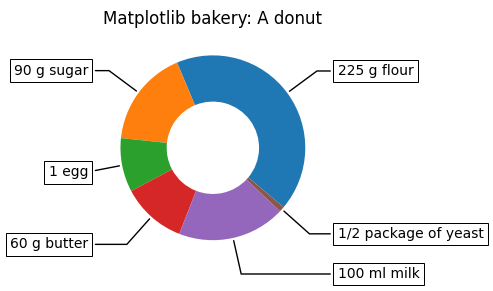

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

# Box Plot